In [1]:
import os

import pandas
import numpy
import matplotlib.pyplot as plt

from ProblemInstance import ProblemInstance
from baseline_intra import bl_intra_1
from baseline_request import bl_req_FCFS
from our_approach import leader_follower

In [2]:
fontsize = 15
neurosim_dir = "NetStructure"  # directory store network structure description file following NeuroSim
summary_file = "NeuroSIMOut/summary.csv"  # simulation result get from NeuroSim

In [3]:
def get_time(problem, plan): 
    return problem.running_time_decompose(*problem.get_pc_packages_from_plan(*plan))

In [4]:
seed = 10
n_req = 200

intra_read_time = []
inter_read_time = []
our_read_time = []

intra_write_time = []
inter_write_time = []
our_write_time = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
nn_ids = numpy.argsort(multi_model_problem.profile["L"])[::-1]
for i in range(1, N_M):
    multi_model_problem.get_random_requests(n_req, nn_ids=nn_ids[:i+1], seed=seed)
    
    plan_intra = bl_intra_1(multi_model_problem)
    time_intra = get_time(multi_model_problem, plan_intra)
    intra_read_time.append(time_intra["read latency"])
    intra_write_time.append(time_intra["write latency"])
    
    package_inter = bl_req_FCFS(multi_model_problem) 
    time_inter = multi_model_problem.running_time_decompose(*package_inter)
    inter_read_time.append(time_inter["read latency"])
    inter_write_time.append(time_inter["write latency"])
    
    plan_our = leader_follower(multi_model_problem)
    time_our = get_time(multi_model_problem, plan_our)
    our_read_time.append(time_our["read latency"])
    our_write_time.append(time_our["write latency"])

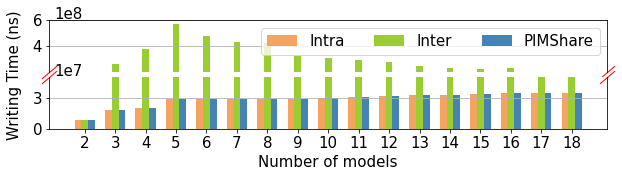

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,2))
ax3 = fig.add_subplot(111, frameon=False)
names = numpy.arange(2, N_M+1)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+3)

ax1.bar(base_xticks-width/2, intra_write_time, width=width_per_col, label="Intra", color='sandybrown')
ax1.bar(base_xticks-width/2 + width_per_col, inter_write_time, width=width_per_col, label="Inter", color='yellowgreen')
ax1.bar(base_xticks-width/2 + width_per_col*2, our_write_time, width=width_per_col, label="PIMShare", color="steelblue")

ax2.bar(base_xticks-width/2, intra_write_time, width=width_per_col, label="Intra", color='sandybrown')
ax2.bar(base_xticks-width/2 + width_per_col, inter_write_time, width=width_per_col, label="Inter", color='yellowgreen')
ax2.bar(base_xticks-width/2 + width_per_col*2, our_write_time, width=width_per_col, label="PIMShare", color="steelblue")

ax1.set_xticks(ticks=base_xticks-width_per_col/2, labels=names,fontsize=fontsize)
ax1.set_yticks(ticks=[4e8, 6e8], labels=[4, 6], fontsize=fontsize)
ax1.text(-10,6.1e8,"1e8",fontsize=fontsize)
ax2.set_xticks(ticks=base_xticks-width_per_col/2, labels=names, fontsize=fontsize)
ax2.set_yticks(ticks=[0, 3e7], labels=[0, 3], fontsize=fontsize)
ax2.text(-10,5.1e7,"1e7",fontsize=fontsize)

ax2.set_ylim(0, 5e7)
ax1.set_ylim(2e8, 6e8)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(bottom=False)
ax1.grid(axis='y')
ax2.grid(axis='y')

d = .85 
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='r', mec='r', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax3.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax2.set_xlabel("Number of models", fontsize=fontsize)
ax3.set_ylabel("Writing Time (ns)", fontsize=fontsize)
ax1.legend(ncol=3, fontsize=fontsize)
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

In [6]:
seed = 1
n_req = 200
n_req_step = 20
n_req_start = n_req//n_req_step

intra_write_time = []
inter_write_time = []
our_write_time = []

multi_model_problem = ProblemInstance(neurosim_dir)
multi_model_problem.read_nn_profile(summary_file)
N_M = multi_model_problem.N_M
for i in range(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step):
    multi_model_problem.get_random_requests(i, seed=seed)
    
    plan_intra = bl_intra_1(multi_model_problem)
    time_intra = get_time(multi_model_problem, plan_intra)
    intra_read_time.append(time_intra["read latency"])
    intra_write_time.append(time_intra["write latency"])
    
    package_inter = bl_req_FCFS(multi_model_problem) 
    time_inter = multi_model_problem.running_time_decompose(*package_inter)
    inter_read_time.append(time_inter["read latency"])
    inter_write_time.append(time_inter["write latency"])
    
    plan_our = leader_follower(multi_model_problem)
    time_our = get_time(multi_model_problem, plan_our)
    our_read_time.append(time_our["read latency"])
    our_write_time.append(time_our["write latency"])

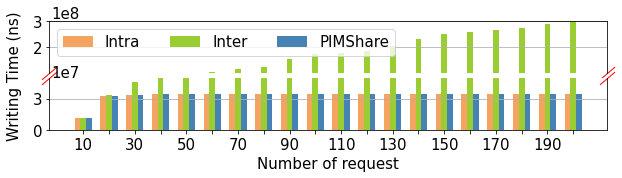

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,2))
ax3 = fig.add_subplot(111, frameon=False)
names = numpy.arange(n_req_start, n_req+n_req//n_req_step, n_req//n_req_step)
n_col = 3
width = 6
width_per_col = width/n_col
base_xticks = numpy.arange(len(names)) * (width+3)

ax1.bar(base_xticks-width/2, intra_write_time, width=width_per_col, label="Intra", color='sandybrown')
ax1.bar(base_xticks-width/2 + width_per_col, inter_write_time, width=width_per_col, label="Inter", color='yellowgreen')
ax1.bar(base_xticks-width/2 + width_per_col*2, our_write_time, width=width_per_col, label="PIMShare", color="steelblue")

ax2.bar(base_xticks-width/2, intra_write_time, width=width_per_col, label="Intra", color='sandybrown')
ax2.bar(base_xticks-width/2 + width_per_col, inter_write_time, width=width_per_col, label="Inter", color='yellowgreen')
ax2.bar(base_xticks-width/2 + width_per_col*2, our_write_time, width=width_per_col, label="PIMShare", color="steelblue")


ax1.set_yticks(ticks=[2e8, 3e8], labels=[2, 3], fontsize=fontsize)
ax1.text(-12,3.1e8,"1e8",fontsize=fontsize)
ax2.set_xticks(ticks=base_xticks-width_per_col/2, labels=[n if i%2==0 else "" for i,n in enumerate(names)],rotation=0, fontsize=fontsize)
ax2.set_yticks(ticks=[0, 3e7], labels=[0, 3], fontsize=fontsize)
ax2.text(-12,5.1e7,"1e7",fontsize=fontsize)

ax2.set_ylim(0, 5e7)
ax1.set_ylim(1e8, 3e8)


ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(bottom=False)
ax1.grid(axis='y')
ax2.grid(axis='y')

d = .85
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15,
              linestyle='none', color='r', mec='r', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0],transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax3.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax2.set_xlabel("Number of request", fontsize=fontsize)
ax3.set_ylabel("Writing Time (ns)", fontsize=fontsize)
ax1.legend(ncol=3, fontsize=fontsize)
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()